In [49]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from uncertainties import ufloat
from uncertainties import unumpy
import scipy.misc
import scipy.stats


In [11]:
T_f = np.array([32.3, 14.9, 23.6, 17.8, 22.9]) + 273.15
m_1 = np.array([191, 76, 165, 41, 170])
T_1 = np.array([47.5, 45.9, 47.4, 45.3, 46.3]) + 273.15
m_2 = np.array([91, 146, 172, 68, 181])
T_2 = np.array([0.3, 0.3, 1.3, 0.3, 0.3]) + 273.15

x = (m_1 * T_1 + m_2 * T_2) / (m_1 + m_2)


In [47]:
x

array([305.41879433, 289.06081081, 297.02121662, 290.3766055 ,
       295.72920228])

In [43]:
def model(x, m):
    return m * x

# Does the fit
init_params=[0]
lin_opt, lin_cov = opt.curve_fit(model, x, T_f, p0=init_params)

# Best fit values
m = lin_opt
dm = np.sqrt(np.diag(lin_cov))


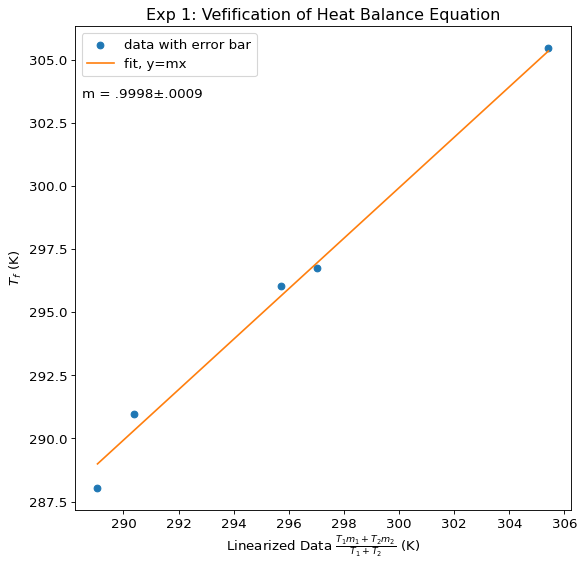

In [46]:
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.scatter(x, T_f, label="data with error bar")
x_space = np.linspace(min(x),max(x))
plt.plot(x_space, model(x_space, m), label='fit, y=mx', color='tab:orange')

plt.title("Exp 1: Vefification of Heat Balance Equation")
plt.xlabel(r"Linearized Data $\frac{T_1m_1+T_2m_2}{T_1+T_2}$ (K)")
plt.ylabel(r"$T_f$ (K)")

plt.text(288.5,303.5, "m = .9998±.0009")
# plt.text(288.5,302.5, "b = -10±20")
# plt.xlim(0,.257)
# plt.ylim(-3.7,0)
plt.legend()
plt.show()


In [50]:
scipy.stats.linregress(x, T_f)

LinregressResult(slope=1.02106832363937, intercept=-6.297464844167678, rvalue=0.9959600094825292, pvalue=0.0003080640491013605, stderr=0.053151847663058645, intercept_stderr=15.710534075049182)

In [41]:
m

array([0.99976686])

In [42]:
dm

array([0.00092783])